# MSDS 432, Assignment 4 - Quick Sort

#### Author: Brandon Moretz

In [2]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
import matplotlib.style as style

In [3]:
np.random.seed(323) # static seed so results are reproducible

In [4]:
style.use('seaborn-poster') # sets the size of the charts
style.use('ggplot') # set the theme for matplotlib

### Person Type

In [73]:
class Person:
    
    def __init__(self, first_name, last_name, address):
        """Initialize a new Person object."""
        self._fname = first_name
        self._lname = last_name
        self._address = address
        
    def first_name(self):
        return self._fname
    
    def last_name(self):
        return self._lname
    
    def address(self):
        return self._address
    
    def __str__(self):
        return self._lname + ", " + self._fname + " : " + self._address
    
    def to_dict(self):
        return {
            'address' : self._address,
            'first_name' : self._fname,
            'last_name' : self._lname
        }

## Sorting Algorithms

In [90]:
def quickSort(array):
    """Quicksort, uses divide and conquer strategy to sort an array, O(n log n)"""
    if len(array) < 2:
        # base case, arrays with 0 or 1 elements are already sorted.
        return array
    else:
        # recursive case
        pivot = array[0]
        # sub-array of all elements less than the pivot
        less = [i for i in array[1:] if i <= pivot]
        # sub-array of all elements greather than the pivot
        greater = [i for i in array[1:] if i >= pivot]
        return quicksort(less) + [pivot] + quicksort(greater)

def insertionSort(arr):
    """Insertion Sort Algorithm, O(N**2)"""

    for i in range(len(arr)):
        j = i
        while j > 0 and (arr[j] <arr[j-1]):
            arr[j], arr[j-1] = arr[j-1], arr[j]
            j = j - 1
    return arr

def profile(func):
    """Utility function to help profile the runtime of code blocks."""
    start_time = time()
    func()
    return time() - start_time

def sort_df(df, column_idx, key):
    """Takes dataframe, column index and custom function for sorting, 
    returns dataframe sorted by this column using this function"""
    
    col = df.ix[:,column_idx]
    temp = np.array(col.values.tolist())
    order = sorted(range(len(temp)), key=lambda j: key(temp[j]))
    return df.ix[order]

def sort_pd(key=None,reverse=False,cmp=None):
    def sorter(series):
        series_list = list(series)
        return [series_list.index(i) 
           for i in sorted(series_list,key=key,reverse=reverse,cmp=cmp)]
    return sorter

### Sample Data

In [74]:
states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
characters = [chr(i) for i in range(97,123)]

def gen_code():
    return ''.join([characters[int(np.random.uniform(0, 26))] for k in range(0, 10)])

people = []

for index in range(0, 50):
    state_index = int(np.random.uniform(0, 50 - index)) # randomly select a state from the list.
    state = states[state_index] # save the value.
    states.remove(state) # remove it from possible selections to avoid duplication.
    
    people.append(Person(gen_code(), gen_code(), state)) # add it to our list of people.

df_people = pd.DataFrame.from_records([p.to_dict() for p in people]) # convert our model of people into a pandas dataframe.

In [75]:
df_people # show the dataframe of people.

,address,first_name,last_name
0,IN,qudkrzyixa,tcpgwmkqen
1,CT,ydccmriktx,xaxllkeoeu
2,NY,ysrdcteazx,zcdgegrqmj
3,AK,etktkipmll,ukstxybthy
4,MN,gcziwmsegs,aovuvpdoty
5,MI,jwubgthaog,aaoxthbqem
6,FL,jntrnuphqn,nlakliamgy
7,TX,eyfhszmhsl,qeelcymzft
8,KS,sqbeqhvzyx,sjemoxvysz
9,WI,cdfwqbontu,vwlccuhucc


## Benchmark

In [121]:
# Create the output metrics DataFrame
results = pd.DataFrame(columns = ['Quick Sort', 'Insertion Sort', 'Default Sort'])

# Benchmark Sorting routines
qs_time = profile(lambda: [ df_people.apply(quickSort, 0) for k in range(0, 1000)]) / 1000
is_time = profile(lambda: [ df_people.apply(insertionSort, 0) for k in range(0, 1000)]) / 1000
ds_time = is_time = profile(lambda: [ df_people.sort_values(by = ['first_name', 'last_name', 'address']) for k in range(0, 1000)]) / 1000

results.loc[0] = [qs_time, is_time, ds_time]

## Results

In [118]:
results # display the results table / DataFrame

,Quick Sort,Insertion Sort,Default Sort
0,0.001698,0.000857,0.000857


## Summary

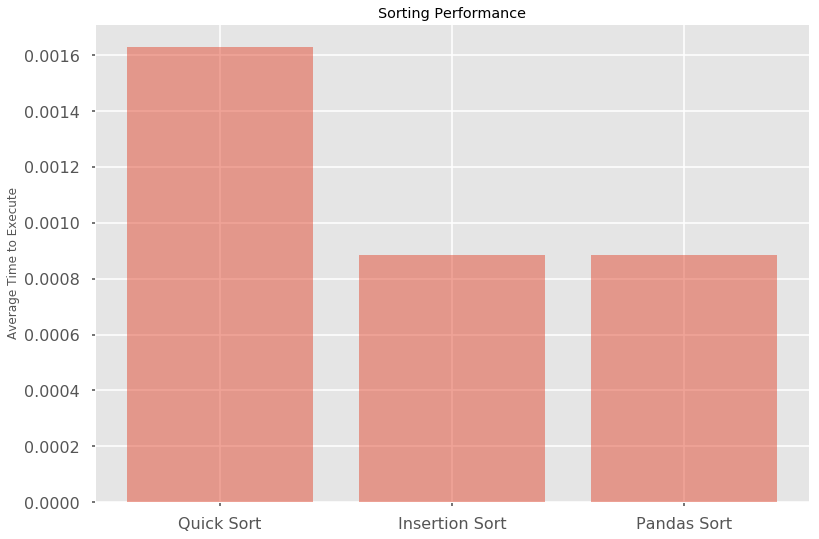

In [123]:
sorters = ('Quick Sort', 'Insertion Sort', 'Pandas Sort')
y_pos = np.arange(len(sorters))
performance = [qs_time, is_time, ds_time]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, sorters)
plt.ylabel('Average Time to Execute')
plt.title('Sorting Performance')
 
plt.show()